# Week 3:  Data Analysis, Preprocessing, and Linear Regression

## Data Analysis

We will start by visualizing and examining a classic dataset in the medical domain:  the diabetes dataset.  We begin by setting up the required libraries.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import describe

We will be using the `pandas` library to manipulate and clean our data.  The most basic object in the `pandas` module is the `DataFrame`, which you can think of as similar to a spreadsheet that stores all of the tabular data we will be using.

The dataset we will be using is the *Ames Housing Dataset*, which is available over at Kaggle:  https://www.kaggle.com/datasets/shashanknecrothapa/ames-housing-dataset.  We will use the training data provided in this Kaggle competition:  https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data.  Download the data set there and put `train.csv` in the same folder as this notebook.

In [2]:
df = pd.read_csv('train.csv')
display(df)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


We have the dataset displayed here and we can already see a couple of things about the dataset.  First, we identify the target, which by documentation is the `SalesPrice` column of the `pandas` dataframe.  Second, a cursory inspection reveals we have missing values, as indicated by the `NaN` entries.  Third, we have categorical data, which will need to be addressed.

We start by finding all the columns with `NaN` values and seeing how prevalent they are.

In [3]:
# We check the missing counts
missing_count = df.isnull().sum()

# Display the counts; we use IPython to show it
from IPython.display import display, HTML
display(HTML(missing_count.to_frame().to_html()))

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
Street,0
Alley,1369
LotShape,0
LandContour,0
Utilities,0


It looks like the following features have large numbers of missing information:  Lot Frontage, Mass Vnr Type, Fireplace Qu, Pool QC, Fence, Misc Feature.  We will go ahead and drop those features since they lack too much information.  Here, we will drop those with more than 400 `NaN` values.  We will use the `dropna` function with the `axis` set to 1 (the features) and the `thresh` set to 1300, meaning we want the columns with at least 1300, non-`NaN` values.

In [4]:
df = df.dropna(axis=1, thresh=1300)
display(df)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


Next, we will simply drop the remaining samples that have missing values.

In [5]:
df = df.dropna(axis=0)
display(df)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [6]:
# Verify there are no nulls
print(df.isnull().sum().eq(0).all())

True


Next, we need want to see the distribution of values for our features.  First, we note that the Id feature is no needed.  So we go ahead and drop that.

In [7]:
# Drop the Id features
df = df.drop('Id', axis=1)

Now we move to analyze the distribution of our features.  We will use the `describe` function here, with custom percentiles, to quickly find out how distributed our features are.

In [8]:
# Create the statistical summary with a custom list of percentiles
summary = df.describe(percentiles=[.01, .05, .25, .5, .75, .95, .99])
display(HTML(summary.to_html()))

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.00000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.00000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,56.136024,10706.294469,6.219731,5.596413,1973.029148,1985.668909,110.360239,464.234679,49.218236,582.494768,1095.947683,1176.221973,357.141256,4.221973,1537.585202,0.438714,0.060538,1.575486,0.402840,2.864723,1.029895,6.550075,0.648729,1978.596413,1.87145,501.449925,99.384903,47.782511,21.263827,3.585949,16.43423,3.010463,42.932735,6.331839,2007.805680,186761.782511
std,41.252576,10336.621126,1.324472,1.078124,29.563540,20.296463,185.604816,458.792420,166.196584,439.950528,405.554435,386.644986,440.324982,40.712916,520.579960,0.515630,0.241685,0.547570,0.504185,0.776677,0.174697,1.585071,0.645393,24.773741,0.63428,186.761863,127.537065,65.362562,60.843964,30.224622,58.05159,41.961337,508.056255,2.699437,1.330691,78913.847668
min,20.000000,1300.000000,2.000000,2.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,105.000000,438.000000,0.000000,0.000000,438.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,1900.000000,1.00000,160.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,2006.000000,35311.000000
1%,20.000000,1876.770000,4.000000,3.000000,1900.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,419.840000,525.370000,0.000000,0.000000,756.440000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,4.000000,0.000000,1916.000000,1.00000,190.110000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,2006.000000,75370.000000
5%,20.000000,3303.100000,4.000000,5.000000,1918.850000,1950.000000,0.000000,0.000000,0.000000,0.000000,600.000000,685.700000,0.000000,0.000000,864.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,4.000000,0.000000,1929.000000,1.00000,240.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2.000000,2006.000000,100000.000000
25%,20.000000,7744.000000,5.000000,5.000000,1956.000000,1968.000000,0.000000,0.000000,0.000000,248.000000,819.750000,894.000000,0.000000,0.000000,1160.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.00000,377.500000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,5.000000,2007.000000,135000.000000
50%,50.000000,9600.000000,6.000000,5.000000,1976.000000,1994.500000,0.000000,413.000000,0.000000,489.000000,1021.500000,1098.000000,0.000000,0.000000,1480.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.00000,484.000000,6.000000,28.000000,0.000000,0.000000,0.00000,0.000000,0.000000,6.000000,2008.000000,168500.000000
75%,70.000000,11760.750000,7.000000,6.000000,2001.000000,2004.000000,174.000000,733.000000,0.000000,815.750000,1324.000000,1414.000000,740.500000,0.000000,1791.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.00000,583.000000,174.500000,70.000000,0.000000,0.000000,0.00000,0.000000,0.000000,8.000000,2009.000000,220000.000000
95%,160.000000,17508.850000,8.000000,8.000000,2007.000000,2007.000000,464.300000,1280.300000,412.350000,1480.300000,1754.500000,1838.150000,1151.150000,0.000000,2485.300000,1.000000,1.000000,2.000000,1.000000,4.000000,1.000000,10.000000,2.000000,2007.000000,3.00000,857.150000,342.

It looks like several features are heavily biased toward the value of $0.0$.  This can and will throw off some of our algorithms.  Therefore, we will list out the features and then drop them.

In [9]:
# Get the features that are all mostly 0, i.e. more than 95% are zero
mostly_zero_features = df.columns[df.eq(0.0).mean() > 0.95].to_list()
print(mostly_zero_features)

# Drop those features
df = df.drop(mostly_zero_features, axis=1)
display(df)

['LowQualFinSF', '3SsnPorch', 'PoolArea', 'MiscVal']


,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,Y,0,61,0,0,2,2008,WD,Normal,208500
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,Y,298,0,0,0,5,2007,WD,Normal,181500
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,Y,0,42,0,0,9,2008,WD,Normal,223500
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,Y,0,35,272,0,2,2006,WD,Abnorml,140000
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,Y,192,84,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,Y,0,40,0,0,8,2007,WD,Normal,175000
1456,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,Y,349,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,Y,0,60,0,0,5,2010,WD,Normal,266500
1458,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,Y,366,0,112,0,4,2010,WD,Normal,142125


Now we need to convert our categorical features to values we can use.  A cursory examination shows that most of the remaining features that are categorical are not ordinal, i.e. their information does not depend on the order.  Consequently, we will want to encode these features as *dummy variables*.  To do this we use the `pandas` method `get_dummies`.

In [10]:
df = pd.get_dummies(df, dtype=float)
display(df)

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,2003,2003,196.0,706,0,150,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,20,9600,6,8,1976,1976,0.0,978,0,284,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,60,11250,7,5,2001,2002,162.0,486,0,434,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,70,9550,7,5,1915,1970,0.0,216,0,540,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,60,14260,8,5,2000,2000,350.0,655,0,490,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,6,5,1999,2000,0.0,0,0,953,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1456,20,13175,6,6,1978,1988,119.0,790,163,589,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1457,70,9042,7,9,1941,2006,0.0,275,0,877,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1458,20,9717,5,6,1950,1996,0.0,49,1029,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


This resulted in our features expanding from 69 to 257.

Let's go ahead and save our cleaned data to a csv for future use.

In [11]:
# Save cleaned data
#df.to_csv('train_cleaned.csv')

Next we want to look at some of the continuously valued features, plot histograms and scatter plots to see how they behave.  Let's start with LotArea and MasVnrArea.

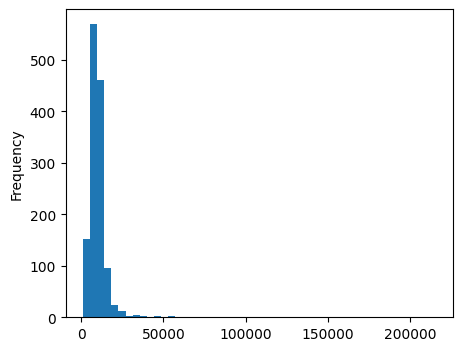

In [12]:
ax = df['LotArea'].plot.hist(bins=50, figsize=(5,4))

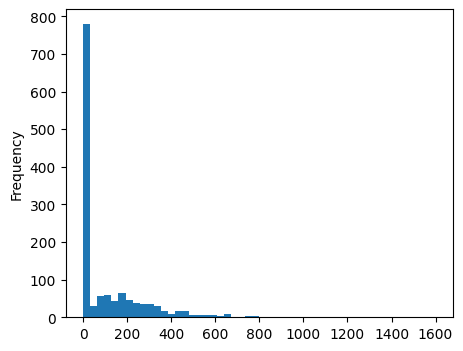

In [13]:
ax = df['MasVnrArea'].plot.hist(bins=50, figsize=(5,4))

We see that these two features have a roughly exponential distribution, with most of the values being at or near 0.  Next we check a few other features to see if they have similar behavior.

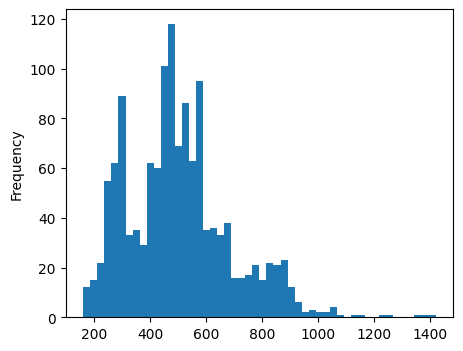

In [14]:
ax = df['GarageArea'].plot.hist(bins=50, figsize=(5,4))

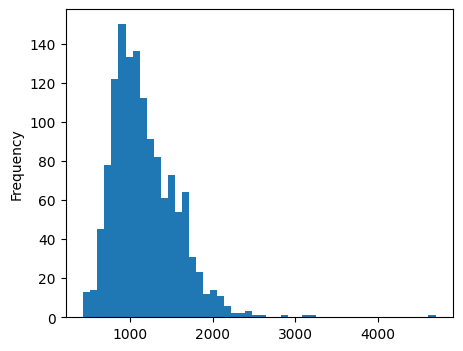

In [15]:
ax = df['1stFlrSF'].plot.hist(bins=50, figsize=(5,4))

Here we have broadly normally distributed data, with some extreme outliers (mansions?).  Let's see how these features compare to price using a scatter plot.

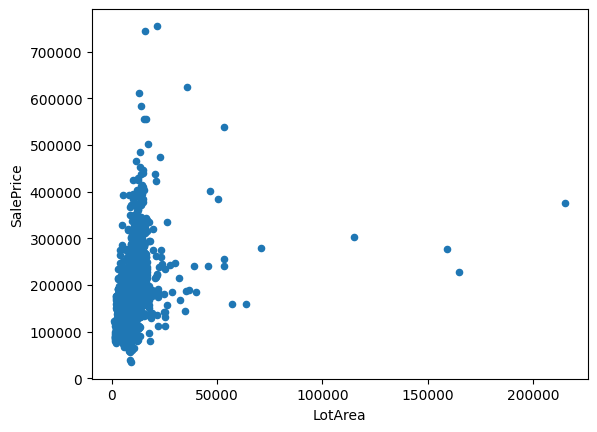

In [16]:
ax = df.plot.scatter(x='LotArea', y='SalePrice')

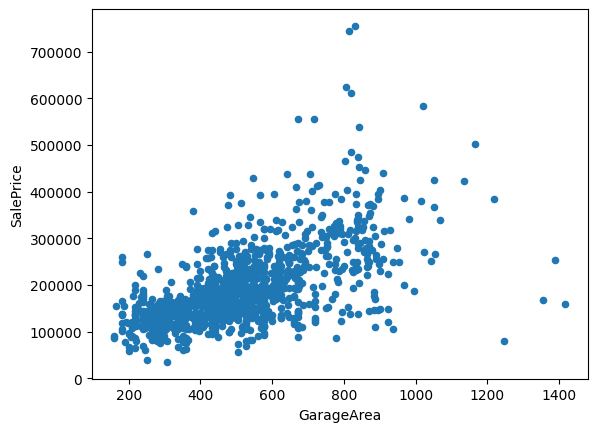

In [17]:
ax = df.plot.scatter(x='GarageArea', y='SalePrice')

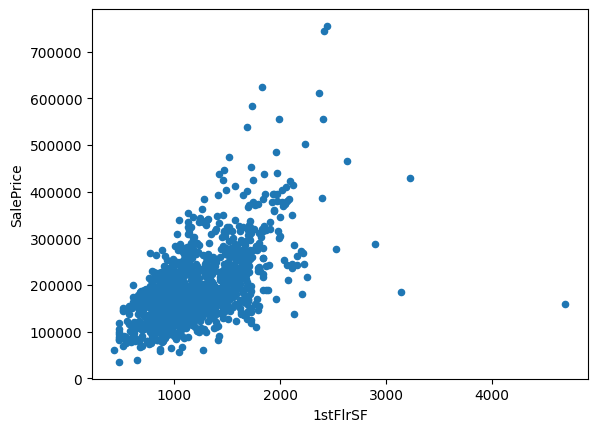

In [18]:
ax = df.plot.scatter(x='1stFlrSF', y='SalePrice')

While the LotArea isn't really useful for prediction, the GarageArea and 1stFlrSF are, which makes sense since these are houses.  When we look at how well our model does, we should keep an eye on these features to see how much weight the model assigns to them.

Next, we break our frame into features and targets.  By the documentation of the dataset, the target feature is SalePrice.

In [19]:
# Break into features and targets
X = df.drop('SalePrice', axis=1)
display(X)
Y = df['SalePrice']
display(Y)

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,2003,2003,196.0,706,0,150,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,20,9600,6,8,1976,1976,0.0,978,0,284,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,60,11250,7,5,2001,2002,162.0,486,0,434,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,70,9550,7,5,1915,1970,0.0,216,0,540,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,60,14260,8,5,2000,2000,350.0,655,0,490,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,6,5,1999,2000,0.0,0,0,953,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1456,20,13175,6,6,1978,1988,119.0,790,163,589,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1457,70,9042,7,9,1941,2006,0.0,275,0,877,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1458,20,9717,5,6,1950,1996,0.0,49,1029,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1338, dtype: int64

# Data Preprocessing

Now we can begin data preprocessing.  First, we convert out data to `numpy` arrays.

In [20]:
X, Y = X.to_numpy(),  Y.to_numpy()

Now we do some rescaling. This will transform our data to between values of 0 and 1. We use the `sklearn` `MinMaxScaler` for this.

In [21]:
from sklearn.preprocessing import MinMaxScaler

# Create the MinMaxScaler
mm_scaler = MinMaxScaler()

# Features before scaling
print(X)

# Resize the features
X_scale_minmax = mm_scaler.fit_transform(X=X)

# Features after scaling
print(X_scale_minmax)


[[6.000e+01 8.450e+03 7.000e+00 ... 0.000e+00 1.000e+00 0.000e+00]
 [2.000e+01 9.600e+03 6.000e+00 ... 0.000e+00 1.000e+00 0.000e+00]
 [6.000e+01 1.125e+04 7.000e+00 ... 0.000e+00 1.000e+00 0.000e+00]
 ...
 [7.000e+01 9.042e+03 7.000e+00 ... 0.000e+00 1.000e+00 0.000e+00]
 [2.000e+01 9.717e+03 5.000e+00 ... 0.000e+00 1.000e+00 0.000e+00]
 [2.000e+01 9.937e+03 5.000e+00 ... 0.000e+00 1.000e+00 0.000e+00]]
[[0.23529412 0.0334198  0.625      ... 0.         1.         0.        ]
 [0.         0.03879502 0.5        ... 0.         1.         0.        ]
 [0.23529412 0.04650728 0.625      ... 0.         1.         0.        ]
 ...
 [0.29411765 0.03618687 0.625      ... 0.         1.         0.        ]
 [0.         0.03934189 0.375      ... 0.         1.         0.        ]
 [0.         0.04037019 0.375      ... 0.         1.         0.        ]]


An alternative scaler is to use the `StandardScaler`.  This one removes the mean of our data and rescales according to standard deviation.  An example can be found below:

In [22]:
from sklearn.preprocessing import StandardScaler

# Create the scaler
std_scaler = StandardScaler()

# Resize the features
X_scale_std = std_scaler.fit_transform(X=X)

# Features after scaling
print(X_scale_std)

[[ 0.09370132 -0.21836324  0.58933748 ... -0.12318485  0.46038736
  -0.31388241]
 [-0.87629764 -0.10706672 -0.16596285 ... -0.12318485  0.46038736
  -0.31388241]
 [ 0.09370132  0.0526196   0.58933748 ... -0.12318485  0.46038736
  -0.31388241]
 ...
 [ 0.33620106 -0.16106973  0.58933748 ... -0.12318485  0.46038736
  -0.31388241]
 [-0.87629764 -0.09574351 -0.92126319 ... -0.12318485  0.46038736
  -0.31388241]
 [-0.87629764 -0.074452   -0.92126319 ... -0.12318485  0.46038736
  -0.31388241]]


Finally, sometimes we would want to correct for the distribution of our data.  This is if we happen to have data that is skewed towards multiple ends.  Here, we make use of the `Normalizer`.

In [23]:
from sklearn.preprocessing import Normalizer

# Create the normalizer
normalizer = Normalizer()

# Resize the features
X_renorm = normalizer.fit_transform(X=X)

# Features after normalizing
print(X_renorm)

[[6.20649106e-03 8.74080824e-01 7.24090623e-04 ... 0.00000000e+00
  1.03441518e-04 0.00000000e+00]
 [1.87302482e-03 8.99051913e-01 5.61907445e-04 ... 0.00000000e+00
  9.36512409e-05 0.00000000e+00]
 [4.91425058e-03 9.21421983e-01 5.73329234e-04 ... 0.00000000e+00
  8.19041763e-05 0.00000000e+00]
 ...
 [6.74152739e-03 8.70812724e-01 6.74152739e-04 ... 0.00000000e+00
  9.63075342e-05 0.00000000e+00]
 [1.86662254e-03 9.06898561e-01 4.66655635e-04 ... 0.00000000e+00
  9.33311270e-05 0.00000000e+00]
 [1.82189797e-03 9.05210008e-01 4.55474493e-04 ... 0.00000000e+00
  9.10948987e-05 0.00000000e+00]]


One important thing we should note is that in all of these scaling operations, we rescaled *all of our data* in a way that is unproductive because of our one-hot encoding or dummy variables.  An important rule of thumb is that we should not rescale our dummy variables, since they are already in the right format for most of our data processing.  Consequently, we need to breakup our preprocessing to only rescale our our continuous and integer features and not our categorical features.

To do this we will need to track the columns that are categorical features.  Fortunately, when we used get_dummies, pandas added the dummy variables as the last $n$ features to our data frame.  So we simply locate the first feature that only 0s and 1s and then only transform the data before that column.  Here we will use the `StandardScaler` since it better handles outliers, which our data has, and will work better with our linear regression.

In [24]:
# Find the first column with all the required values
for i in range(X.shape[1]):
    if np.all(np.isin(X[:,i], [0.0, 1.0])):
        first_dummy_col = i
        break

# Rescale only the first_dummy_col - 1 features
X_rescaled = X.copy()
X_rescaled[:,:i] = std_scaler.fit_transform(X_rescaled[:,:i])

print(X_rescaled)
print(X)

[[ 0.09370132 -0.21836324  0.58933748 ...  0.          1.
   0.        ]
 [-0.87629764 -0.10706672 -0.16596285 ...  0.          1.
   0.        ]
 [ 0.09370132  0.0526196   0.58933748 ...  0.          1.
   0.        ]
 ...
 [ 0.33620106 -0.16106973  0.58933748 ...  0.          1.
   0.        ]
 [-0.87629764 -0.09574351 -0.92126319 ...  0.          1.
   0.        ]
 [-0.87629764 -0.074452   -0.92126319 ...  0.          1.
   0.        ]]
[[6.000e+01 8.450e+03 7.000e+00 ... 0.000e+00 1.000e+00 0.000e+00]
 [2.000e+01 9.600e+03 6.000e+00 ... 0.000e+00 1.000e+00 0.000e+00]
 [6.000e+01 1.125e+04 7.000e+00 ... 0.000e+00 1.000e+00 0.000e+00]
 ...
 [7.000e+01 9.042e+03 7.000e+00 ... 0.000e+00 1.000e+00 0.000e+00]
 [2.000e+01 9.717e+03 5.000e+00 ... 0.000e+00 1.000e+00 0.000e+00]
 [2.000e+01 9.937e+03 5.000e+00 ... 0.000e+00 1.000e+00 0.000e+00]]


## Linear Regression

Since this is a regression problem, we will be relying upon a linear regression.  Recall that a linear regression makes predictions by weighting each of the features by some coefficients and then adding an offset:

$$ \hat{y} = f(\mathbf{x}) = \mathbf{\theta}^{\intercal}\mathbf{x} = \theta_{0}x_{0} + \theta_{1}x_{1} + \cdots + \theta_{n}x_{n} $$

Here we treat the vector $\mathbf{x}$ as having an identity feature for $x_{0}$, i.e. $x_{0} = 1$.  Typically, we ignore this feature and simply use $\theta_{0}$ as a bias term that we add to our linear regression.  Here we will use `sklearn` built in linear regression class.

First, we will split our data into a training and hold-out test suite.  Then we will further divide our training data into train and validation data using cross-validation.  A standard practice is to use 10-fold splits.

Second, we will be using `mean_squared_error` to assess our model performance.  The reason why we do not use `roc_auc_score` or `log_loss` is due to this being a regression problem---not a classification problem.  Recall that the `mean_squared_error` corresponds to the negative log-likelihood under the probabilistic model where our regression likelihood is given by a normal distribution $\mathcal{N}(y | \mathbf{\theta}^{\intercal}\mathbf{x}, \sigma^{2})$.

In [25]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error

# Split the data into train and hold-out test data
indices = np.arange(X.shape[0])
X_tr, X_te, Y_tr, Y_te, idx_tr, idx_te = train_test_split(X_rescaled, Y, indices, test_size=0.2, random_state=123)

# Build kfolds, using 10-fold
kf = KFold(n_splits=10)

# Split the data
kfold = kf.split(X=X_tr, y=Y_tr)

Next we assess how well this particular model does via our cross-validation.

In [26]:
from sklearn.linear_model import LinearRegression

# Scores
scores = []

for k, (train, test) in enumerate(kfold):
    # Initialize model
    lr_model = LinearRegression()

    # Fit the model
    lr_model.fit(X=X_tr[train], y=Y_tr[train])

    # Predictions
    y_hats = lr_model.predict(X=X_tr[test])

    # Score the model
    mse = mean_squared_error(y_true=Y_tr[test], y_pred=y_hats)
    scores.append(mse)

    print(f'Fold: {k}, MSE: {mse}')

mean_mse = np.mean(scores)
std_mse = np.std(scores)

print(f'CV MSE: {mean_mse} +/- {std_mse}')

Fold: 0, MSE: 2.485330068820125e+27
Fold: 1, MSE: 9.81130728621227e+27
Fold: 2, MSE: 5.242450787999822e+27
Fold: 3, MSE: 1.7038175944166939e+28
Fold: 4, MSE: 2.5324006834892725e+27
Fold: 5, MSE: 4.3751898337853773e+30
Fold: 6, MSE: 6.766078586387709e+27
Fold: 7, MSE: 6.900453772460254e+26
Fold: 8, MSE: 2484837657.3271027
Fold: 9, MSE: 3.4561972639413726e+28
CV MSE: 4.4543175951591136e+29 +/- 1.309956448823338e+30


Remember that lower is better for mean squared error.  We have this now as a baseline for OLS.  Let's see if we can do better using a regularized regression, Ridge Regression.  Here we penalize our weights, so that our loss is now:

$$ \underset{i=0}{\overset{m}{\sum}} (\mathbf{x}^{(i)^{\intercal}}\mathbf{\theta} - y^{(i)})^{2} + \alpha \underset{i=0}{\overset{n}{\sum}}\theta_{i}^{2} $$

This can be thought of as penalizing complexity in the underlying model.  We use `sklearn`'s `Ridge` model.

In [27]:
from sklearn.linear_model import Ridge

# Scores
scores = []

# Split the data
kfold = kf.split(X=X_tr, y=Y_tr)

for k, (train, test) in enumerate(kfold):
    # Initialize model
    ridge_model = Ridge(alpha=0.5)

    # Fit the model
    ridge_model.fit(X=X_tr[train], y=Y_tr[train])

    # Predictions
    y_hats = ridge_model.predict(X=X_tr[test])

    # Score the model
    mse = mean_squared_error(y_true=Y_tr[test], y_pred=y_hats)
    scores.append(mse)

    print(f'Fold: {k}, MSE: {mse}')

mean_mse = np.mean(scores)
std_mse = np.std(scores)

print(f'CV MSE: {mean_mse} +/- {std_mse}')

Fold: 0, MSE: 729813957.3885419
Fold: 1, MSE: 1471410388.7292151
Fold: 2, MSE: 508948571.2366245
Fold: 3, MSE: 497480340.73512584
Fold: 4, MSE: 822732568.4493859
Fold: 5, MSE: 1019515848.1287923
Fold: 6, MSE: 571090265.5834349
Fold: 7, MSE: 519107885.7982742
Fold: 8, MSE: 2505653467.0265164
Fold: 9, MSE: 914819608.8625929
CV MSE: 956057290.1938503 +/- 590834122.796725


With a penalty of $0.5$, we see that our MSE is now much lower than before.  At this point, we would try to find the optimal $\alpha$ that would lower our score the most, but I leave that as an excersize.  Now we want to plot our results with a scatter plot.  First, we train both our linear and ridge models on the full training data.  Then we test them on the hold-out test set and plot their relative predictions.

In [28]:
# Train both models
lr_model = LinearRegression()
ridge_model = Ridge(alpha=0.5)

lr_model.fit(X=X_tr, y=Y_tr)
ridge_model.fit(X=X_tr, y=Y_tr)

# Compute predictions on test data
y_hats_lr = lr_model.predict(X=X_te)
y_hats_ridge = ridge_model.predict(X=X_te)

# Compute MSE on both
mse_lr = mean_squared_error(y_true=Y_te, y_pred=y_hats_lr)
mse_ridge = mean_squared_error(y_true=Y_te, y_pred=y_hats_ridge)

print(f'The MSE for the linear regression is {mse_lr}\n'
      f'The MSE for the ridge regression is {mse_ridge}')

The MSE for the linear regression is 1.3887113800294882e+27
The MSE for the ridge regression is 2182375945.5643735


As expected, we see the ridge regression does noticably better.  This validates our use of the regularization effect to improve predictive performance.

We now look at the plots for `1stFlrSF` and `GarageArea`.  What we do is scatter plot the first 20 values and see how far off our prediction is from the true value.

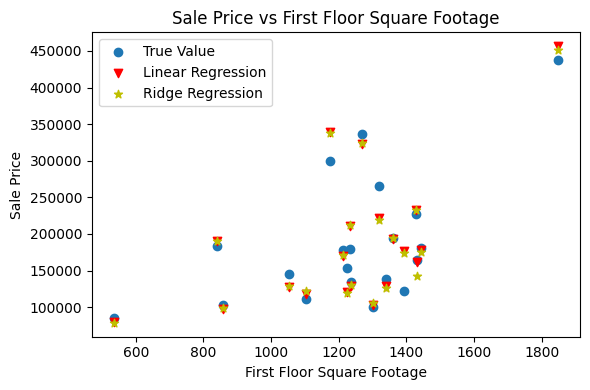

In [29]:
# Get the original dataframe samples before preprocessing
floor_values = df['1stFlrSF'].iloc[idx_te].to_numpy()
sales_price = df['SalePrice'].iloc[idx_te].to_numpy()

# First floor square foot
fig, axs = plt.subplots(figsize=((6,4)))

# Add the plots
axs.scatter(floor_values[:20], sales_price[:20])
axs.scatter(floor_values[:20], y_hats_lr[:20], c='r', marker='v')
axs.scatter(floor_values[:20], y_hats_ridge[:20], c='y', marker='*')

# Add labels and title
axs.set_xlabel('First Floor Square Footage')
axs.set_ylabel('Sale Price')
axs.set_title('Sale Price vs First Floor Square Footage')

# Add legend
axs.legend(['True Value', 'Linear Regression', 'Ridge Regression'])

fig.tight_layout()

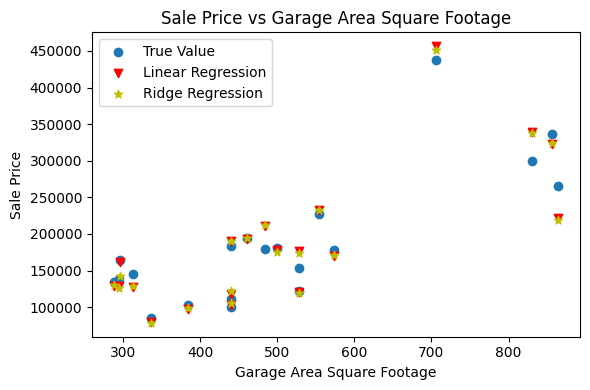

In [30]:
# Get the original dataframe samples before preprocessing
garage_values = df['GarageArea'].iloc[idx_te].to_numpy()
sales_price = df['SalePrice'].iloc[idx_te].to_numpy()

# First floor square foot
fig, axs = plt.subplots(figsize=((6,4)))

# Add the plots
axs.scatter(garage_values[:20], sales_price[:20])
axs.scatter(garage_values[:20], y_hats_lr[:20], c='r', marker='v')
axs.scatter(garage_values[:20], y_hats_ridge[:20], c='y', marker='*')

# Add labels and title
axs.set_xlabel('Garage Area Square Footage')
axs.set_ylabel('Sale Price')
axs.set_title('Sale Price vs Garage Area Square Footage')

# Add legend
axs.legend(['True Value', 'Linear Regression', 'Ridge Regression'])

fig.tight_layout()

The predicted values are pretty close! It seems from both that the ridge regression tends to be closer on the whole.